In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
HousePrices = pd.read_csv("evfiyatlari.csv")

In [ ]:
HousePrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   MetreKare   128 non-null    int64
 1   YatakOdasi  128 non-null    int64
 2   Banyo       128 non-null    int64
 3   Fiyat       128 non-null    int64
dtypes: int64(4)
memory usage: 4.1 KB


In [ ]:
print(HousePrices.shape)

(128, 4)


In [ ]:
HousePrices.head()

,MetreKare,YatakOdasi,Banyo,Fiyat
0,1790,2,2,114300
1,2030,4,2,114200
2,1740,3,2,114800
3,1980,3,2,94700
4,2130,3,3,119800


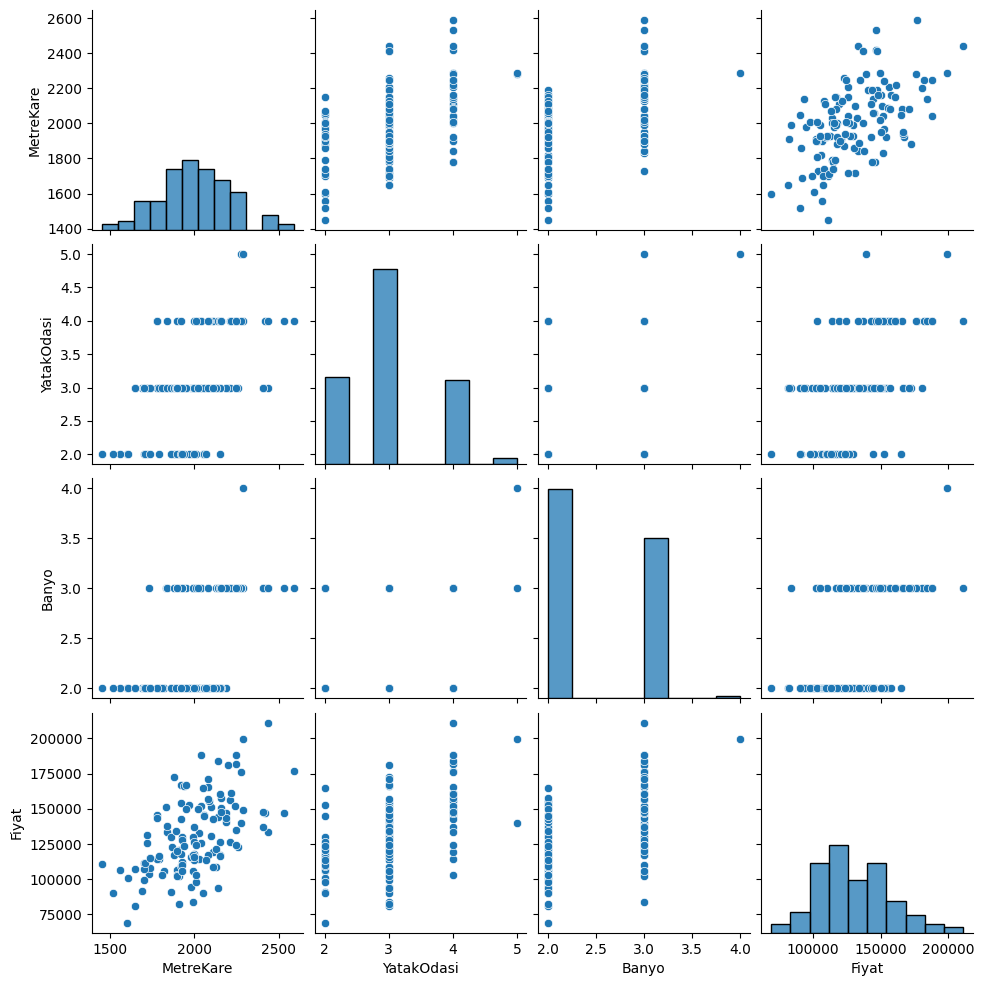

In [ ]:
sns.pairplot(HousePrices)

In [ ]:
x = HousePrices[["MetreKare", "YatakOdasi", "Banyo"]]
y = HousePrices[["Fiyat"]]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, = train_test_split(x_scaled, y, test_size = 0.2,random_state=1)

In [ ]:
x_train.shape

(102, 3)

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()

model.add( Dense( units=20, activation='relu', input_dim = 3))
model.add( Dense( units=10, activation='relu'))
model.add( Dense( units=1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=('mean_squared_error'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                80        
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.81)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=('mean_squared_error'))

In [ ]:
history =model.fit(x_train, y_train, epochs=100, batch_size=12)

Epoch 1/100
9/9 [==============================] - 1s 5ms/step - loss: 16484425728.0000 - mean_squared_error: 16484425728.0000
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 5031182848.0000 - mean_squared_error: 5031182848.0000
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 2845386752.0000 - mean_squared_error: 2845386752.0000
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 1436779520.0000 - mean_squared_error: 1436779520.0000
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 732620736.0000 - mean_squared_error: 732620736.0000
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 482193888.0000 - mean_squared_error: 482193888.0000
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 409156224.0000 - mean_squared_error: 409156224.0000
Epoch 8/100
9/9 [==============================] - 0s 3ms/step - loss: 407491840.0000 - mean_squared_error: 407491840.0000
Epoch 

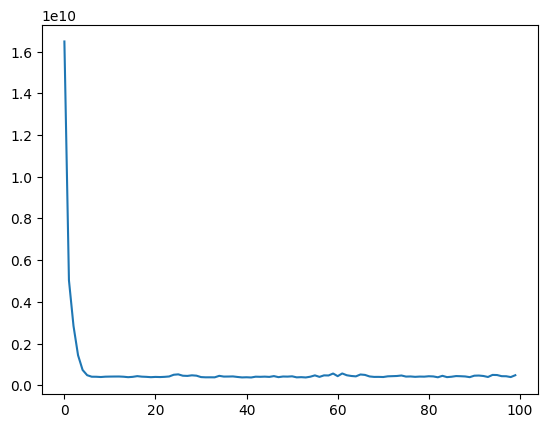

In [ ]:
plt.plot(history.history["loss"])
plt.show()

In [ ]:
y_head = model.predict(x_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error
print("Mean Absolute Error :",mean_absolute_error(y_test, y_head))
print("Mean Squared Error :",mean_squared_error(y_test,y_head))

1/1 [==============================] - 0s 25ms/step
Mean Absolute Error : 18298.22956730769
Mean Squared Error : 520009779.0800969
